## This is the (?) practical task of Sirius summer school "Applying AI for Med image analysis". 
Practical tasks take form of jupyter notebook with example code in the begging and some tasks in the end. Please, provide your solution in form of python code. Read hints, google a lot, don't hesitate to ask us directyl and most importatly - 
<span style="color:blue">have fun</span>.

**Topic**: Morphological operators

**To submit**: New version of the notebook, with your code. 

**Task**: This time you will have to implement two morphological operators (dilation and erosion) withouth using any high-level libraries. Your goal is to compare your results with standard implementation and hopefully achieve similar results. 

In [ ]:
!pip install pydicom

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pydicom 
from matplotlib import pyplot as plt
file = pydicom.read_file("/content/drive/My Drive/Inno/data/aorta/1/I10.dicom")
img = file.pixel_array

In [ ]:
from skimage import morphology as mh

def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

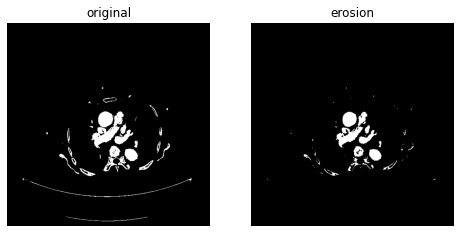

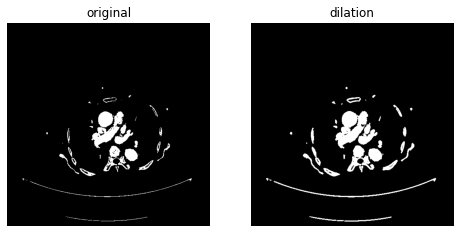

In [ ]:
binarized = img>1200 #some arbitrary thresholding 
plot_comparison(binarized,(mh.erosion(binarized)),"erosion")
plot_comparison(binarized,(mh.dilation(binarized)),"dilation")


In [ ]:
import numpy as np #The only library you allowed to use :D 

## **Task:**
- This time you will have to implement two morphological operators (dilation and erosion) withouth using any high-level libraries. Your goal is to compare your results with standard implementation and hopefully achieve similar results. 
- Given: two function signatures
- Do: Create your own version using only numpy library and compare them with skimage versions. You are **not** allowed to use opencv, skimage. If in doubt about some library - ask us directly


### Good luck, have fun. 
ps. you can google ideas, but please try to write your own code. 

In [ ]:
def my_dilation(image):
  if not isinstance(image, np.ndarray):
    raise TypeError("Expected type 'numpy.ndarray', got " + type(image).__name__ + ".")
  h, w = image.shape
  transformed = np.copy(image)
  for i in range(h):
    for j in range(w):
      if image[i][j] == 1:
        if i > 0 and image[i-1][j] == 0: 
          transformed[i-1][j] = 1
        if j > 0 and image[i][j-1] == 0: 
          transformed[i][j-1] = 1
        if i+1 < w and image[i+1][j] == 0: 
          transformed[i+1][j] = 1
        if j+1 < h and image[i][j+1] == 0: 
          transformed[i][j+1] = 1
  return transformed

def my_erosion(image):
  if not isinstance(image, np.ndarray):
    raise TypeError("Expected type 'numpy.ndarray', got " + type(image).__name__ + ".")
  transformed = my_dilation(np.invert(image))
  transformed = np.invert(transformed)
  return transformed

In [ ]:
def plot_comparison(img_1, name_1, img_2, name_2):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(img_1, cmap=plt.cm.gray)
    ax1.set_title(name_1)
    ax1.axis('off')
    ax2.imshow(img_2, cmap=plt.cm.gray)
    ax2.set_title(name_2)
    ax2.axis('off')

True

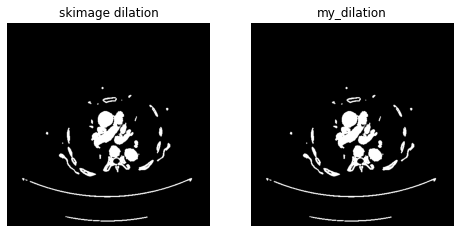

In [ ]:
plot_comparison(mh.dilation(binarized),"skimage dilation",my_dilation(binarized),"my_dilation") 
(mh.dilation(binarized) == my_dilation(binarized)).all()

True

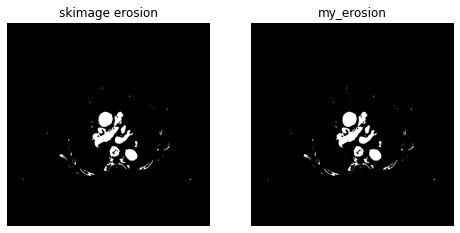

In [ ]:
plot_comparison(mh.erosion(binarized),"skimage erosion",my_erosion(binarized),"my_erosion") 
(mh.erosion(binarized) == my_erosion(binarized)).all()

In [ ]:
# another approach with the use of structure element

In [ ]:
# let selem be cross-shaped structuring element (connectivity=1) as it implemented in skimage
selement = np.array([[0,1,0],[1,1,1],[0,1,0]])

def my_dilation(image, selem=selement):
  if not isinstance(image, np.ndarray):
    raise TypeError("Expected type 'numpy.ndarray', got " + type(image).__name__ + ".")
  transformed = np.copy(image)
  n,m = selem.shape
  h,w = image.shape
  o = int(n/2)
  ones = []
  for i in range(n):
    for j in range(m):
      if selem[i][j] == 1:
        ones.append((i-o,j-o))
  for x in range(o,h-o):
    for y in range(o,w-o):
      if image[x][y] == 1: 
        transformed[x][y] = 1
        for index in ones:
          transformed[x+index[0]][y+index[1]] = 1
  return transformed

def my_erosion(image, selem=selement):
  if not isinstance(image, np.ndarray):
    raise TypeError("Expected type 'numpy.ndarray', got " + type(image).__name__ + ".")
  transformed = my_dilation(np.invert(image), selem=selem)
  transformed = np.invert(transformed)
  return transformed 

True

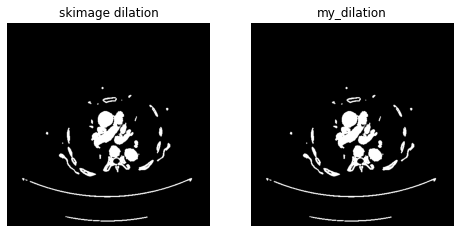

In [ ]:
plot_comparison(mh.dilation(binarized),"skimage dilation",my_dilation(image=binarized,selem=selement),"my_dilation") 
(mh.dilation(binarized) == my_dilation(image=binarized,selem=selement)).all()

True

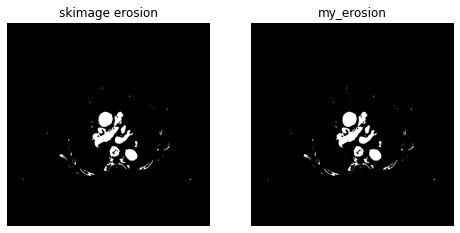

In [ ]:
plot_comparison(mh.erosion(binarized),"skimage erosion",my_erosion(image=binarized,selem=selement),"my_erosion") 
(mh.erosion(binarized) == my_erosion(image=binarized,selem=selement)).all()